In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=400,n_features=2,n_informative=2,n_redundant=0,n_classes=2,
                       n_clusters_per_class=1,random_state=3)

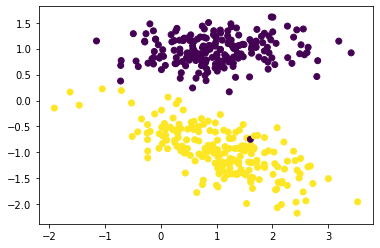

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
y[y==0]=-1

In [5]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C   ## penalty
        self.b=0
        self.W=0
    
    def hingeloss(self, W, b, X, y):
        loss = 0.0
        loss += 0.5 * np.dot(W, W.T)
        m = X.shape[0]
        
        for i in range(m):
            ti = y[i] * (np.dot(W, X[i].T) + b) # W is of the shape mx1, X is of shape mx2
            loss += self.C * max(0, 1-ti)
        
        return loss[0][0] # to get scalar
    
    def fit(self, X, y, learning_rate=0.01, maxItr=300, batch_size=100):
        no_of_features = X.shape[1]
        
        no_of_samples = X.shape[0]
        n = learning_rate
        c = self.C
        
        # initialize the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        # initial loss
#         print(self.hingeloss(W, bias, X, y))

        losses = []
        
        # for gradient descent with random shuffling
        for i in range(maxItr):
            # training loop
            l = self.hingeloss(W, bias, X, y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # for gradient descent with random shuffling
            for batch_start in range(0, no_of_samples, batch_size):
                gradw = 0
                gradb = 0
                
                # iterate over all examples in my minibatch
                for j in range(batch_start, batch_start + batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = y[i] * (np.dot(W, X[i].T) + bias)
                        
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * y[i] * X[i]
                            gradb += c * y[i]
                    
            # gradient for batch is ready, update W and b
            W = W - n * W + n * gradw
            bias = bias + n * gradb
        
        self.W = W
        self.b = bias
        return W, bias, losses

In [6]:
model = SVM(C=1)
# if penalty(C) is increased then margin will reduce, because model will try to reduce the loss 
#hence reduce the penalty by reducing the distance

In [7]:
W,b,losses=model.fit(X, y,maxItr=100)

In [8]:
losses[-1]

14.63240132640755

In [9]:
W[0,0],W[0,1]

(-0.25833574581722485, -2.1143618983657726)

In [10]:
def hyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1=np.linspace(-1,4,10)
    x2=-(w1*x1+b)/w2
    
    xp=-(w1*x1+b+1)/w2
    xn=-(w1*x1+b-1)/w2
    
    plt.plot(x1, x2, label="WX+B=0")       
    plt.plot(x1, xp, label="WX+B=+1")
    plt.plot(x1, xn, label="WX+B=-1")
    
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.legend()
    plt.show()

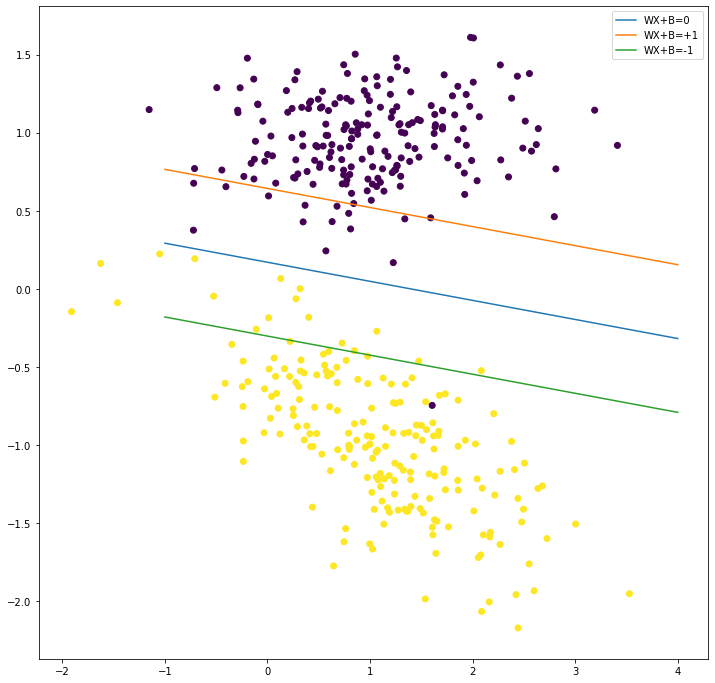

In [13]:
hyperplane(W[0,0],W[0,1],b)